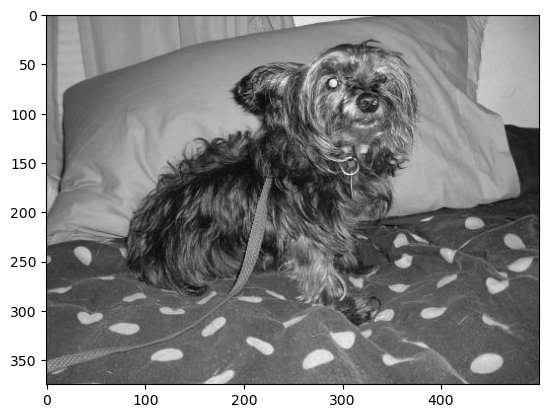

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

# Directory to Pictures
DATA_DIR = "C:/Users/muhle/Desktop/Code/DataSets/PetAI"
# Kategorien die zu erkennen sind
CATEGORIES = ["DOG", "CAT"]

# Die Ordner mit den Kategorien im Namen Suchen, anschließend alle Bilder in Schwarz-Weiß umformen 
for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        # Anzeigen eines Bildes mit Matplotlib
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

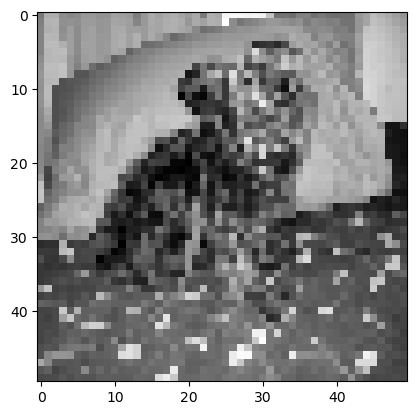

In [3]:
# Größe des Bildes definieren
IMG_SIZE = 50
# Größe des Bild Array's ändern
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
# Neues verpixeltes Bild anzeigen
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [4]:
# Liste für Trainingsdaten definieren
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATA_DIR,category)  # Pfad zu Hunde und Katzen erstellen
        class_num = CATEGORIES.index(category)  # Klassifikation für Hund und Katze bekommen, Hund=0; Katze=1;

        for img in tqdm(os.listdir(path)):  # Bilder von Katzen und Hunden wiederholen
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # Bild zu einen Array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # Größe zu einer normalen Datengröße machen (50,50)
                training_data.append([new_array, class_num])  # Hinzufügen zu unserer Liste trainings_data
            except Exception as e:  # Wenn ein Fehler auftritt soll es einfach übersrpingen und weitermachen
                pass
create_training_data()

100%|██████████| 12501/12501 [01:16<00:00, 163.02it/s]


In [9]:
# Länge der training_data
print(len(training_data))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
import random
# Random Werte aus training_data nehmen
random.shuffle(training_data)

In [10]:
# Array ausgeben
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
0
1
0
0
1
1


In [11]:
#Input (X) und Output (y) definieren
X = []
y = []


In [8]:

for features, label in training_data: 
    X.append(features)
    y.append(label)
    
# X in einen Numpy Array umwandeln und ihn eine neue Größe geben, 1 Farmkanal (Grau)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [9]:
import pickle
# X und y in Pickle dateien schreiben
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()


In [10]:
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [11]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

In [12]:
X[1]

array([[[102],
        [139],
        [155],
        ...,
        [113],
        [ 98],
        [ 32]],

       [[108],
        [146],
        [160],
        ...,
        [114],
        [ 90],
        [ 16]],

       [[116],
        [148],
        [161],
        ...,
        [ 92],
        [ 14],
        [ 13]],

       ...,

       [[ 99],
        [ 97],
        [105],
        ...,
        [ 77],
        [ 75],
        [ 71]],

       [[102],
        [108],
        [103],
        ...,
        [ 76],
        [ 70],
        [ 73]],

       [[107],
        [102],
        [110],
        ...,
        [ 86],
        [ 74],
        [ 80]]], dtype=uint8)